In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf


2023-07-15 19:11:48.765127: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
true_df= (pd.read_csv("True.csv"))
fake_df= (pd.read_csv("Fake.csv"))

In [3]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


# EDA and Data Cleaning

## Null Values

In [5]:
print('In case of Fake data.')
print(fake_df.isnull().sum())
print()
print('In case of Real data.')
print(true_df.isnull().sum())

In case of Fake data.
title      0
text       0
subject    0
date       0
dtype: int64

In case of Real data.
title      0
text       0
subject    0
date       0
dtype: int64


In [6]:
print('Fake news: ')
print(fake_df.subject.unique())
print()
print('Real news: ')
print(true_df.subject.unique())

Fake news: 
['News' 'politics' 'Government News' 'left-news' 'US_News' 'Middle-east']

Real news: 
['politicsNews' 'worldnews']


In [7]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [8]:
#Combining both datafreames

In [9]:
true_df['category'] = "True"
fake_df['category'] = "Fake"

In [10]:
news_df = pd.concat([true_df,fake_df]) #Merging the 2 datasets

In [11]:
news_df

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",Fake
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",Fake
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",Fake
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",Fake


#### Dropping duplicates

In [12]:
news_df = news_df.drop_duplicates()
news_df = news_df.reset_index(drop=True)

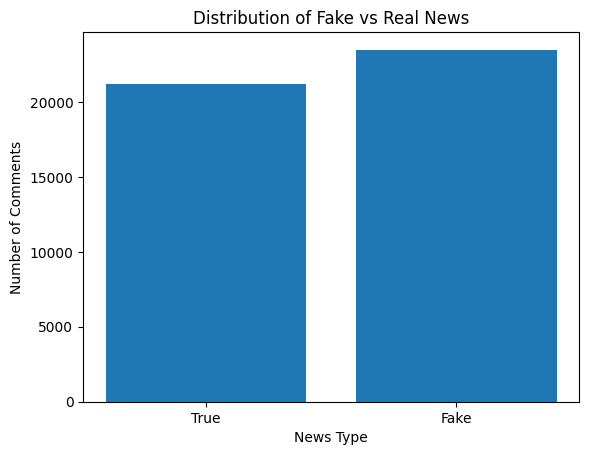

In [13]:
# Count the number of fake and true news
true_news =(news_df['category']=="True").sum()
fake_news = len(news_df) - true_news

# Create a bar plot
plt.bar(['True', 'Fake'], [true_news, fake_news])

# Add labels and title
plt.xlabel('News Type')
plt.ylabel('Number of Comments')
plt.title('Distribution of Fake vs Real News')

# Show the plot
plt.show()

## We can see that the dataset is balanced

In [14]:
news_df.head()

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


# Text Preprocessing

[Text(0, 0, 'politicsNews'),
 Text(1, 0, 'worldnews'),
 Text(2, 0, 'News'),
 Text(3, 0, 'politics'),
 Text(4, 0, 'Government News'),
 Text(5, 0, 'left-news'),
 Text(6, 0, 'US_News'),
 Text(7, 0, 'Middle-east')]

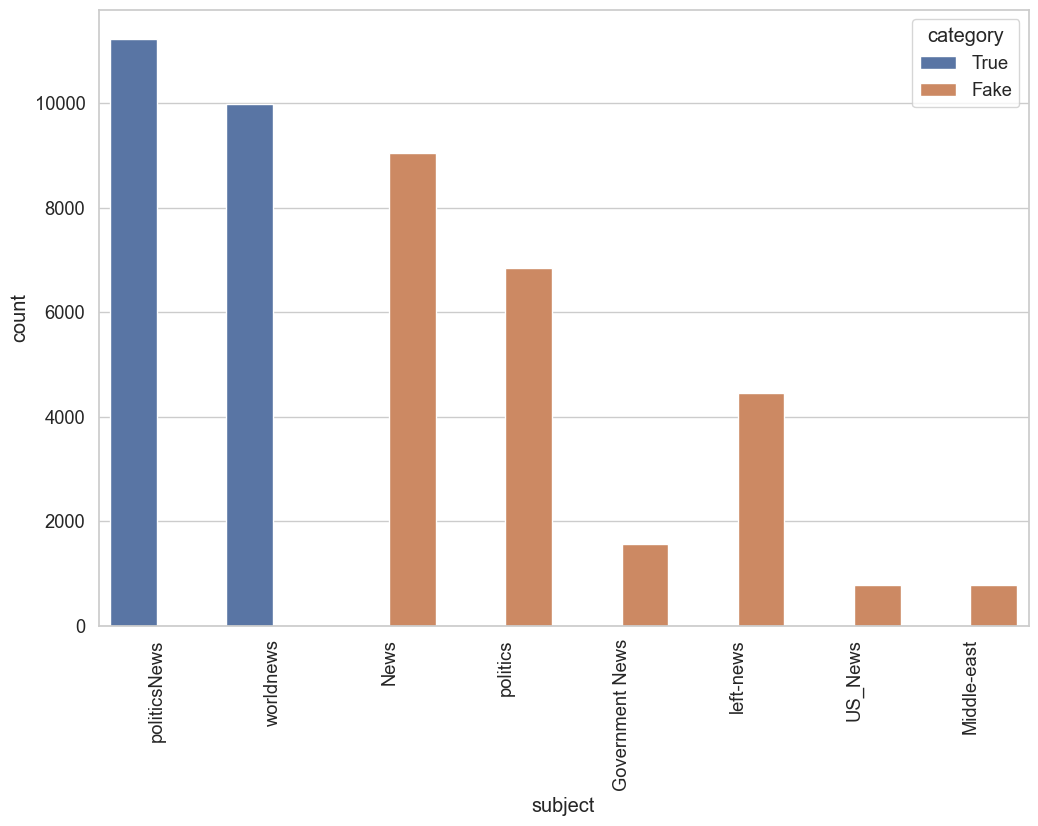

In [15]:
plt.figure(figsize = (12,8))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "subject", hue = "category" , data = news_df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [16]:
# Subject columns are different in both datasets, so we drop them, and the date isnt needed in this analysis

In [17]:
news_df.drop(['date', 'subject'], axis=1, inplace=True)

In [18]:
news_df

,title,text,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,True
...,...,...,...
44684,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Fake
44685,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Fake
44686,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Fake
44687,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Fake


In [19]:
# title and text are both relevant in fake news detection. So we combine both to one df so as to not judge a book by its cover

### title and text are both relevant in fake news detection. So we combine both to one df so as to not judge a book by its cover

In [20]:
news_df['text'] = news_df['title'] + news_df['text']
news_df.drop('title', axis=1, inplace=True)

# Noise Removal

In [21]:
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/tolu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [23]:

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text
#Apply function on review column
news_df['text']=news_df['text'].apply(denoise_text)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/bs4/__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


In [24]:
from nltk.stem import WordNetLemmatizer

# Data Cleaning

In [25]:
def clean_text(text): ## function to clean the data
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower() #make lower case
    text = re.sub('\[.*?\]', ' ', text) #remove text in square brackets
    text = re.sub('https?://\S+|www\.\S+', ' ', text) #remove links
    text = re.sub('@\S+', ' ', text) #remove mentions
    text = re.sub('#\S+', ' ', text) #remove hastags
    text = re.sub('<.*?>+', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text) #remove punctuations
    text = re.sub('\n', ' ', text) #remove newlines
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('\s+', ' ', text) #remove extra white spaces

    return text

#stemming function defined
lemmatizer=WordNetLemmatizer() #initialize lemmatizing object

def lemmatize_text(text):
    '''Reduce words to their base form in a text'''
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split(' '))
    return text

stop_words = stopwords.words('english')
def remove_stopwords(text):
    ''' Remove stop words from text'''
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text

In [26]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/tolu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
news_df['cleaned_comment']=news_df['text'].apply(clean_text) #cleaning the texts

news_df['cleaned_comment']=news_df['cleaned_comment'].apply(remove_stopwords) #removing stopwords

news_df['cleaned_comment']=news_df['cleaned_comment'].apply(lemmatize_text) #lemmatizing the text


In [28]:
news_df.sample(20)

,text,category,cleaned_comment
20083,Brexit talks postponed hand negotiators flexib...,True,brexit talk postponed hand negotiator flexibil...
33453,TRUMP SLAMS GLOBALISTS: “There global anthem…W...,Fake,trump slam globalists “there global anthem…we ...
30064,Experts: ‘Militiamen’ Live Hand Mouth Gov’t Di...,Fake,expert ‘militiamen’ live hand mouth gov’t disa...
14579,"Mugabe: Zimbabwe's liberator and, many, oppres...",True,mugabe zimbabwe liberator many oppressorharare...
33314,STILL BITTER BILL CLINTON: Trump knows get ‘an...,Fake,still bitter bill clinton trump know get ‘angr...
4862,"Despite budget cuts, Tillerson works win long-...",True,despite budget cut tillerson work win long ter...
43447,"President Trump Fires Acting Attorney General,...",Fake,president trump fire acting attorney general s...
31954,NANCY PELOSI GIGGLES LIKE CHILD: Says It’s Har...,Fake,nancy pelosi giggle like child say it’s hard c...
15614,China disputes Trump's claims fentanyl 'flood'...,True,china dispute trump claim fentanyl flood unite...
26621,Even Trump Voters Think Obama’s Economy GreatD...,Fake,even trump voter think obama’s economy greatde...


# Word Cloud

In [29]:
from wordcloud import wordcloud

In [30]:
news_df

,text,category,cleaned_comment
0,"U.S. budget fight looms, Republicans flip fisc...",True,u budget fight loom republican flip fiscal scr...
1,U.S. military accept transgender recruits Mond...,True,u military accept transgender recruit monday p...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,True,senior u republican senator let mr mueller job...
3,FBI Russia probe helped Australian diplomat ti...,True,fbi russia probe helped australian diplomat ti...
4,Trump wants Postal Service charge 'much more' ...,True,trump want postal service charge much amazon s...
...,...,...,...
44684,McPain: John McCain Furious Iran Treated US Sa...,Fake,mcpain john mccain furious iran treated u sail...
44685,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,Fake,justice yahoo settle e mail privacy class acti...
44686,Sunnistan: US Allied ‘Safe Zone’ Plan Take Ter...,Fake,sunnistan u allied ‘safe zone’ plan take terri...
44687,Blow $700 Million: Al Jazeera America Finally ...,Fake,blow million al jazeera america finally call c...


In [31]:
def generate_word_cloud(data, category, text_col):
    fake_news = data[data[category] == "Fake"][text_col]
    true_news = data[data[category] == "True"][text_col]
    
    # Create word cloud for toxic data
    fake_news_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(' '.join(fake_news))
    
    # Create word cloud for non-toxic data
    true_news_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(' '.join(true_news))
    
    # Display word clouds
    fig, axs = plt.subplots(1, 2, figsize=(20, 20))
    axs[0].imshow(fake_news_wordcloud) 
    axs[0].set_title('Fake News') 
    axs[0].axis('off')
    axs[1].imshow(true_news_wordcloud) 
    axs[1].set_title('True News') 
    axs[1].axis('off')
    plt.show()

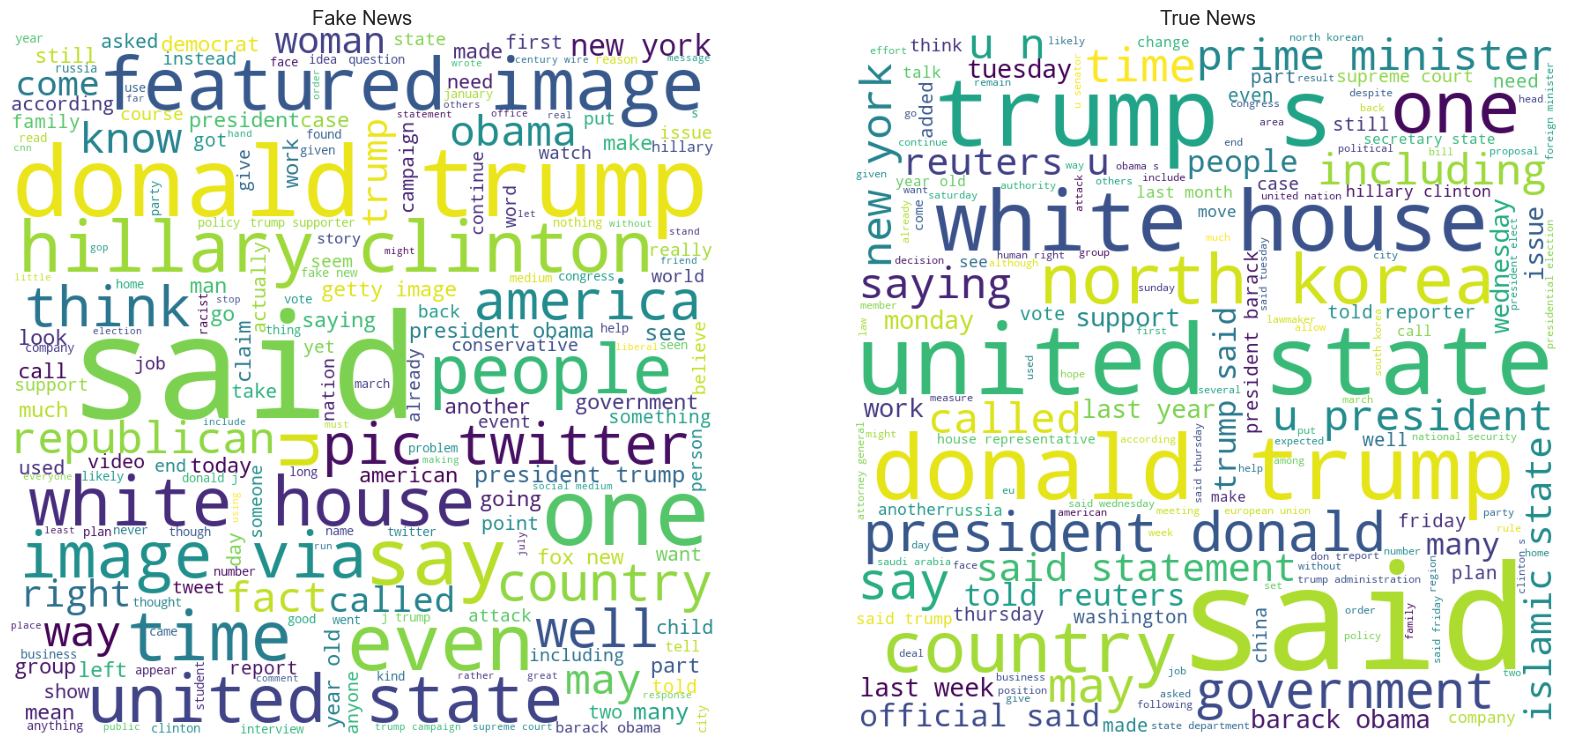

In [32]:
generate_word_cloud(news_df, 'category', 'cleaned_comment')

# Model Preparation

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

list_fake = get_top_n_words(news_df[news_df.category=="Fake"]['cleaned_comment'], 25)
list_true = get_top_n_words(news_df[news_df.category=="True"]['cleaned_comment'], 25)

In [34]:
import plotly.graph_objects as go
new_list_words = [ seq[0] for seq in list_fake ]
new_list_values = [ seq[1] for seq in list_fake ]

fig = go.Figure()
fig.add_trace(go.Bar(y=new_list_values,
                         x=new_list_words,
                        marker_color='lightsalmon'
))
fig.update_layout({
        'plot_bgcolor': 'rgba(0, 0, 0, 0)',
        'paper_bgcolor': 'rgba(0, 0, 0, 0)',
        'title': 'Fake news frequency words'
})
fig.show()

In [35]:
new_list_words = [ seq[0] for seq in list_true ]
new_list_values = [ seq[1] for seq in list_true ]

fig = go.Figure()
fig.add_trace(go.Bar(y=new_list_values,
                         x=new_list_words,
                        marker_color='lightsalmon'
))
fig.update_layout({
        'plot_bgcolor': 'rgba(0, 0, 0, 0)',
        'paper_bgcolor': 'rgba(0, 0, 0, 0)',
        'title': 'True news frequency words'
})
fig.show()

# "Said" is common in both. deleting it from the dataset

In [36]:
# Remove trump, reuters from the text column. existing bias towards reuters news
#news_df['cleaned_comment'] = news_df['cleaned_comment'].str.replace('said', '')

In [37]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/tolu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [38]:
# Now maximum length is required to create word embeddings
maxlen = -1
for news in news_df.cleaned_comment:
    tokens = nltk.word_tokenize(news) #converts text to tokens (words)
    if (maxlen < len(tokens)):
        maxlen = len(tokens)
print ("The maximum number of words in any news is =", maxlen)

The maximum number of words in any news is = 4968


# Modeling

Model Building

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
labels = news_df.category

In [41]:
labels.unique()

array(['True', 'Fake'], dtype=object)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(news_df["cleaned_comment"], labels, test_size = 0.2, random_state = 20)

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier

In [44]:
# initilise a Tfidvectorizer
vector = TfidfVectorizer(stop_words='english', max_df=0.7)

In [45]:
# fit and tranform
tf_train = vector.fit_transform(x_train)
tf_test = vector.transform(x_test)

Passive Aggressive Classifier

In [46]:
# initilise a PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

MultinomialNB

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

In [48]:
multi = MultinomialNB()
multi.fit(tf_train, y_train)



MultinomialNB()

# Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
lgr=LogisticRegression()

In [51]:
lgr_model=lgr.fit(tf_train,y_train)

# XG Boost

In [52]:
from xgboost import XGBClassifier

In [53]:
boost = XGBClassifier(eval_metric='rmse')

In [54]:
xG_model=boost.fit(tf_train,y_train)

# Model Evaluation

In [55]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [59]:
class Evaluation:

    def __init__(self,model,x_train,x_test,y_train,y_test):
        self.model = model
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test

    def train_evaluation(self):
        y_pred_train = self.model.predict(self.x_train)

        acc_scr_train = accuracy_score(self.y_train,y_pred_train)
        print(f"Accuracy Score: {round(acc_scr_train * 100, 2)}%")
        print()

        con_mat_train = confusion_matrix(self.y_train,y_pred_train)
        print("Confusion Matrix On Training Data Set :\n",con_mat_train)
        print()
        confuse = ConfusionMatrixDisplay(confusion_matrix=con_mat_train,display_labels=['Fake', 'True'])
        confuse.plot()

        class_rep_train = classification_report(self.y_train,y_pred_train)
        print("Classification Report On Training Data Set :\n",class_rep_train)


    def test_evaluation(self):
        y_pred_test = self.model.predict(self.x_test)

        acc_scr_test = accuracy_score(self.y_test,y_pred_test)
        print("Accuracy Score On Testing Data Set :",acc_scr_test)
        print()

        con_mat_test = confusion_matrix(self.y_test,y_pred_test)
        print("Confusion Matrix On Testing Data Set :\n",con_mat_test)
        print()

        class_rep_test = classification_report(self.y_test,y_pred_test)
        print("Classification Report On Testing Data Set :\n",class_rep_test)

Passive Aggressive Classifier

Accuracy Score: 100.0%

Confusion Matrix On Training Data Set :
 [[18751     0]
 [    0 17000]]

Classification Report On Training Data Set :
               precision    recall  f1-score   support

        Fake       1.00      1.00      1.00     18751
        True       1.00      1.00      1.00     17000

    accuracy                           1.00     35751
   macro avg       1.00      1.00      1.00     35751
weighted avg       1.00      1.00      1.00     35751



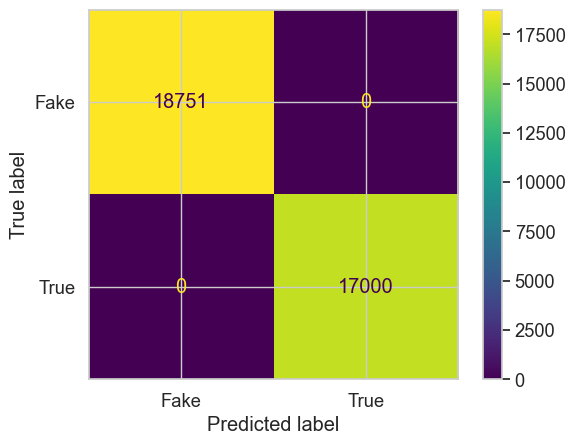

In [57]:
#Checking the accuracy on training dataset

Evaluation(pac,tf_train, tf_test, y_train, y_test).train_evaluation()

In [60]:
Evaluation(pac,tf_train, tf_test, y_train, y_test).test_evaluation()

Accuracy Score On Testing Data Set : 0.9930633251286641

Confusion Matrix On Testing Data Set :
 [[4692   35]
 [  27 4184]]



Classification Report On Testing Data Set :
               precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      4727
        True       0.99      0.99      0.99      4211

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938



In [ ]:
# Save  the model and vectorizer

In [60]:
import pickle
pickle.dump(pac, open('model.pkl', 'wb'))
pickle.dump(vector, open('vectorizer.pkl', 'wb'))

Multinomial Naive Bayes

Accuracy Score: 94.19%

Confusion Matrix On Training Data Set :
 [[17897   854]
 [ 1222 15778]]

Classification Report On Training Data Set :
               precision    recall  f1-score   support

           0       0.94      0.95      0.95     18751
           1       0.95      0.93      0.94     17000

    accuracy                           0.94     35751
   macro avg       0.94      0.94      0.94     35751
weighted avg       0.94      0.94      0.94     35751



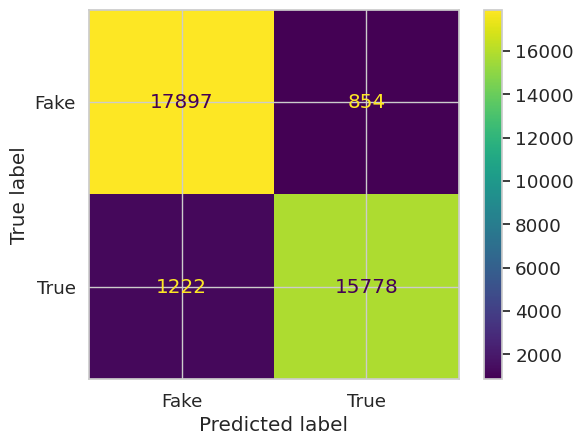

In [128]:
Evaluation(multi,tf_train, tf_test, y_train, y_test).train_evaluation()

Logistic Regression

Accuracy Score: 99.02%

Confusion Matrix On Training Data Set :
 [[18547   204]
 [  146 16854]]

Classification Report On Training Data Set :
               precision    recall  f1-score   support

        Fake       0.99      0.99      0.99     18751
        True       0.99      0.99      0.99     17000

    accuracy                           0.99     35751
   macro avg       0.99      0.99      0.99     35751
weighted avg       0.99      0.99      0.99     35751



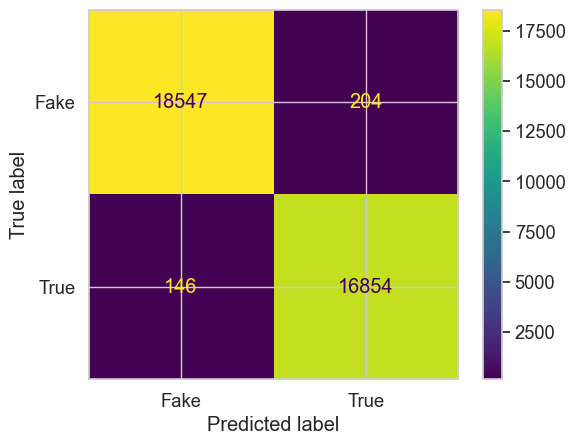

In [61]:
Evaluation(lgr_model,tf_train, tf_test, y_train, y_test).train_evaluation()

In [62]:
Evaluation(lgr_model,tf_train, tf_test, y_train, y_test).test_evaluation()

Accuracy Score On Testing Data Set : 0.9834414857910047

Confusion Matrix On Testing Data Set :
 [[4642   85]
 [  63 4148]]

Classification Report On Testing Data Set :
               precision    recall  f1-score   support

        Fake       0.99      0.98      0.98      4727
        True       0.98      0.99      0.98      4211

    accuracy                           0.98      8938
   macro avg       0.98      0.98      0.98      8938
weighted avg       0.98      0.98      0.98      8938



In [63]:
import pickle
pickle.dump(lgr_model, open('model.pkl', 'wb'))
pickle.dump(vector, open('vectorizer.pkl', 'wb'))

XG Boost

Accuracy Score: 100.0%

Confusion Matrix On Training Data Set :
 [[18751     0]
 [    1 16999]]

Classification Report On Training Data Set :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18751
           1       1.00      1.00      1.00     17000

    accuracy                           1.00     35751
   macro avg       1.00      1.00      1.00     35751
weighted avg       1.00      1.00      1.00     35751



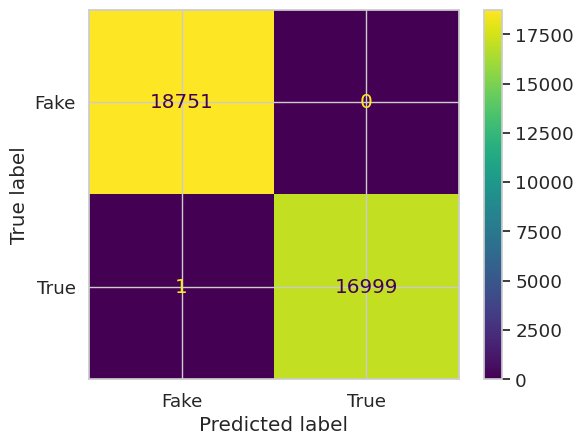

In [130]:
Evaluation(xG_model,tf_train, tf_test, y_train, y_test).train_evaluation()

**Deep  Learning**

In [131]:
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
from nltk import word_tokenize

In [132]:
import gensim.downloader as api
from tqdm import tqdm

In [133]:
from tensorflow.keras.preprocessing import sequence,text

In [134]:
#defining our tokenizer
token=text.Tokenizer(num_words=None)



#required to fit on text before using texts to sequences
token.fit_on_texts(list(x_train) + list(x_test))

xtrain_seq = token.texts_to_sequences(x_train)
xvalid_seq = token.texts_to_sequences(x_test)

#zero pad the sequences
xtrain_pad = sequence.pad_sequences(xtrain_seq, maxlen=maxlen)
xvalid_pad = sequence.pad_sequences(xvalid_seq, maxlen=maxlen)

word_index = token.word_index

Glove Embeddings

In [135]:
embeddings_index = {}
model = api.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


In [136]:
for word in tqdm(model.key_to_index):
    embeddings_index[word] = np.array(model[word], dtype=np.float32)

print('Found %s word vectors.' % len(embeddings_index))

100%|██████████| 400000/400000 [00:01<00:00, 282076.78it/s]

Found 400000 word vectors.


In [137]:
# create an embedding matrix for the words we have in the dataset
embedding_matrix = np.zeros((len(word_index) + 1, 300))
for word, i in tqdm(word_index.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

100%|██████████| 128087/128087 [00:00<00:00, 399651.72it/s]


Keras Tokenizer

In [138]:
# Total number of words in dataset
list_words = []
for i in news_df.cleaned_comment:
    for j in i:
        list_words.append(j)
print ('Total number of words are: {}'.format(len(list_words)))


Total number of words are: 77792712


In [139]:
#total unique words
total_unique_words = len(list(set(list_words)))
total_unique_words

74

In [140]:
tokenizer = Tokenizer(num_words= total_unique_words)
tokenizer.fit_on_texts(x_train) #It creates vocabulary index ("word_index") based on word frequency
train_sequences = tokenizer.texts_to_sequences(x_train) # Replace each word in text with corresponding integer value from "word_index"
test_sequences = tokenizer.texts_to_sequences(x_test)

In [141]:
len(train_sequences)

35751

In [142]:
pad_train = pad_sequences(train_sequences, maxlen = maxlen, padding = 'post', truncating= 'post')
pad_test = pad_sequences(test_sequences, maxlen=maxlen, padding = 'post', truncating= 'post')

In [143]:
# Lets visualize the padding sequence for 1st two samples
for i, news in enumerate(pad_train[:2]):
    print("The padded encoding for news", i+1, " is : ", news)

The padded encoding for news 1  is :  [26 67  2 ...  0  0  0]
The padded encoding for news 2  is :  [ 1 18 16 ...  0  0  0]


**Bi-LSTM**

In [144]:
max_features = 10000
batch_size = 256
epochs = 10
embed_size = 10

In [145]:
# Now lets build the model
model = Sequential()

model.add(Embedding(len(word_index) + 1,
                     300,
                     weights=[embedding_matrix],
                     input_length=maxlen,
                     trainable=False))


model.add(Bidirectional(LSTM(128))) #Bi-directional LSTM

#Dense layer
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid')) # binary classification (0\1)
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics= ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4958, 300)         38426400  
                                                                 
 bidirectional (Bidirectiona  (None, 256)              439296    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 38,898,721
Trainable params: 472,321
Non-trainable params: 38,426,400
_________________________________________________________________


In [146]:
# train the model
model.fit(pad_train, y_train, batch_size= 64, validation_split = 0.1, epochs= 5)

Epoch 1/5
503/503 [==============================] - 262s 501ms/step - loss: 0.0328 - acc: 0.9910 - val_loss: 0.0110 - val_acc: 0.9983
Epoch 2/5
503/503 [==============================] - 256s 509ms/step - loss: 0.0114 - acc: 0.9979 - val_loss: 0.0136 - val_acc: 0.9969
Epoch 3/5
503/503 [==============================] - 257s 510ms/step - loss: 0.0094 - acc: 0.9981 - val_loss: 0.0085 - val_acc: 0.9989
Epoch 4/5
503/503 [==============================] - 269s 535ms/step - loss: 0.0055 - acc: 0.9987 - val_loss: 0.0075 - val_acc: 0.9989
Epoch 5/5
503/503 [==============================] - 248s 493ms/step - loss: 0.0038 - acc: 0.9992 - val_loss: 0.0085 - val_acc: 0.9975


In [147]:
pred = model.predict(pad_test) #prediction

280/280 [==============================] - 35s 124ms/step


In [148]:
# Lets set the threshold 0.5, i.e if pred >0.5, it implies the news is fake and vice versa.
prediction = []
for i in range (len(pred)):
    if pred[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [149]:
#accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), prediction)

print ("The model accuracy is :", accuracy)

The model accuracy is : 0.9984336540613112


<Axes: >

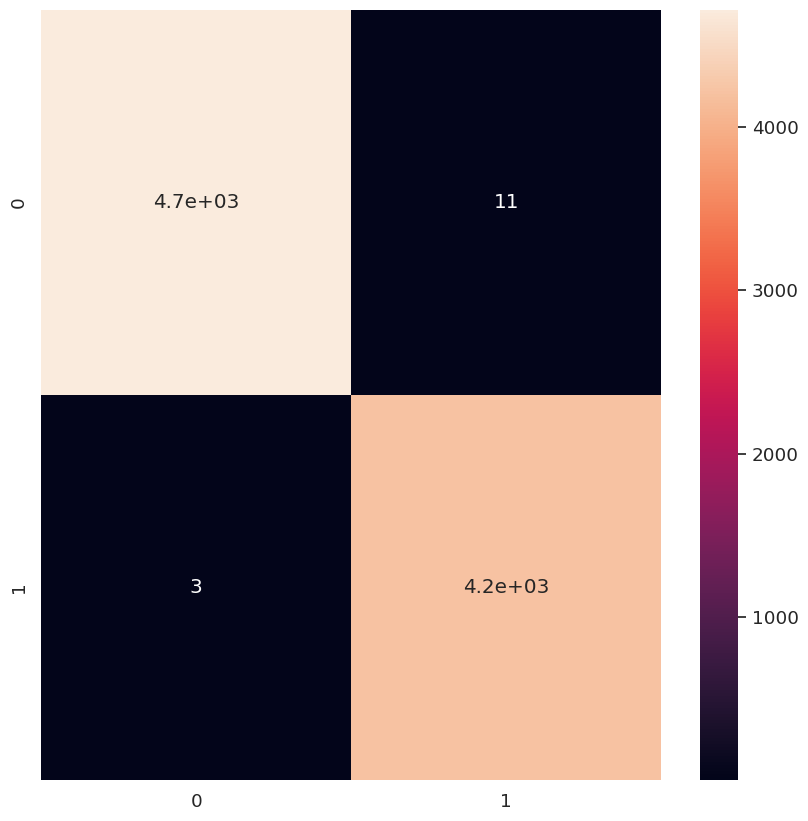

In [150]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot = True)

**B.E.R.T**

In [179]:
import tensorflow as tf

import transformers

from tokenizers import BertWordPieceTokenizer
from keras.layers import Embedding, SimpleRNN, LSTM, Dense, Bidirectional, Input
from keras.optimizers import Adam
from keras import Model

In [180]:
from tqdm import tqdm

def fast_encode(texts, tokenizer, chunk_size=256, maxlen=512):
    """
    Encoder for encoding the text into sequence of integers for BERT Input
    """
    all_ids = []

    tokenizer.enable_truncation(max_length=maxlen)
    tokenizer.enable_padding(length=maxlen)

    for i in tqdm(range(0, len(texts), chunk_size)):
        text_chunk = texts[i:i+chunk_size].tolist()
        encs = tokenizer.encode_batch(text_chunk)
        all_ids.extend([enc.ids for enc in encs])

    return np.array(all_ids)


In [206]:
# First load the real tokenizer
tokenizer = transformers.DistilBertTokenizer.from_pretrained('distilbert-base-multilingual-cased')
# Save the loaded tokenizer locally
tokenizer.save_pretrained('bert_token')
# Reload it with the huggingface tokenizers library
fast_tokenizer = BertWordPieceTokenizer('vocab.txt', lowercase=False)
fast_tokenizer

Tokenizer(vocabulary_size=119547, model=BertWordPiece, unk_token=[UNK], sep_token=[SEP], cls_token=[CLS], pad_token=[PAD], mask_token=[MASK], clean_text=True, handle_chinese_chars=True, strip_accents=None, lowercase=False, wordpieces_prefix=##)

In [184]:
maxlen= 192

In [188]:
X = fast_encode(news_df.cleaned_comment.astype(str), fast_tokenizer, maxlen=maxlen)

100%|██████████| 175/175 [01:12<00:00,  2.41it/s]


In [189]:
X_train, X_val, y_train, y_val = train_test_split(X, labels,
                                                  train_size=0.7,
                                                  random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,
                                                train_size=0.5,
                                               random_state=42)

In [191]:
BATCH_SIZE= 30

In [192]:
train_dataset = (
    tf.data.Dataset
    .from_tensor_slices((X_train, y_train))
    .repeat()
    .shuffle(2048)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

valid_dataset = (
    tf.data.Dataset
    .from_tensor_slices((X_val, y_val))
    .batch(BATCH_SIZE)
    .cache()
    .prefetch(AUTO)
)

test_dataset = (
    tf.data.Dataset
    .from_tensor_slices((X_test, y_test))
    .batch(BATCH_SIZE)
    .cache()
    .prefetch(AUTO)
)


In [198]:
def build_model(transformer, max_len=512):
    """
    function for training the BERT model
    """
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]
    out = Dense(1, activation='sigmoid')(cls_token)

    model = Model(inputs=input_word_ids, outputs=out)
    model.compile(Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [199]:
transformer_layer = (
        transformers.TFDistilBertModel
        .from_pretrained('distilbert-base-multilingual-cased')
    )
model = build_model(transformer_layer, max_len=maxlen)
model.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_word_ids (InputLayer)  [(None, 192)]            0         
                                                                 
 tf_distil_bert_model_1 (TFD  TFBaseModelOutput(last_h  134734080
 istilBertModel)             idden_state=(None, 192,             
                             768),                               
                              hidden_states=None, att            
                             entions=None)                       
                                                                 
 tf.__operators__.getitem_1   (None, 768)              0         
 (SlicingOpLambda)                                               
                                                                 
 dense_7 (Dense)             (None, 1)                 769       
                                                           

In [200]:
n_steps = X_train.shape[0] // BATCH_SIZE
train_history = model.fit(
    train_dataset,
    steps_per_epoch=n_steps,
    validation_data=valid_dataset,
    epochs=EPOCHS
)

Epoch 1/3
1042/1042 [==============================] - 767s 721ms/step - loss: 0.0309 - accuracy: 0.9856 - val_loss: 0.0045 - val_accuracy: 0.9993
Epoch 2/3
1042/1042 [==============================] - 758s 728ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0055 - val_accuracy: 0.9988
Epoch 3/3
1042/1042 [==============================] - 723s 694ms/step - loss: 9.8110e-04 - accuracy: 0.9997 - val_loss: 0.0063 - val_accuracy: 0.9994


Evaluation

In [201]:
preds = model.predict(test_dataset, verbose=1)

224/224 [==============================] - 51s 215ms/step


In [202]:
print(accuracy_score(y_test, np.round(preds)))

0.9992541766109785
